# Tutorial 10

In [73]:
# Importing packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Preparing Data
df = pd.read_csv('Hitters.csv')
df.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [75]:
print(df.Salary.isna().sum())

59


In [76]:
# Drop the player names as they are not a reasonable potential predictor
df = df.drop('Player', axis=1)
# Print the dimensions of the original Hitters data (322 rows x 20 columns)(Players' names not included)
print("before dropna():",df.shape)
# Drop any rows the contain missing values. Note that this is not necessarily the recommended practice for a given problem.
df = df.dropna()
# Print the dimensions of the modified Hitters data (263 rows x 20 columns)
print("after dropna():",df.shape)
# One last check: should return 0
print("check the number of missing salary after dropna():",df["Salary"].isnull().sum())

before dropna(): (322, 20)
after dropna(): (263, 20)
check the number of missing salary after dropna(): 0


In [77]:
df[['League','Division','NewLeague']].head()

,League,Division,NewLeague
1,N,W,N
2,A,W,A
3,N,E,N
4,N,E,N
5,A,W,A


In [78]:
# creating dummy variables
dummies = pd.get_dummies(df[['League','Division','NewLeague']])

In [79]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [80]:
# creating output variables
y = df.Salary

# dropping column with dependant variable (Salary)
X_ = df.drop(['Salary','League','Division','NewLeague'],axis = 1)

# Define the features set X
X = pd.concat([X_,dummies[['League_N','Division_W','NewLeague_N']]],axis = 1)

## Ridge Regression

In [81]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [82]:
# alpha argument is used to tune the variables
# these values cover everything from just to intercept to least squares split
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [83]:
# Use the train_test_split function to split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1)

In [84]:
# standardize the data

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [85]:
# 19*100 matrix or ridge regression coefficients
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train_std,y_train)
    coefs.append(ridge.coef_)
     
np.shape(coefs)

(100, 19)

Text(0, 0.5, 'standardized coef')

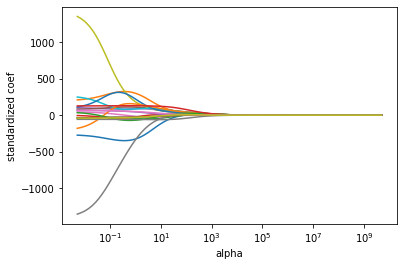

In [86]:
%matplotlib inline
ax = plt.gca() # Get the current Axes instance
ax.plot(alphas,coefs)
ax.set_xscale('log') ## you can try removing this line and see waht it looks likes
plt.xlabel('alpha')
plt.ylabel('standardized coef')

In [87]:
# as we can see, alpha = 4 is the best value
ridge2 = Ridge(alpha=4)
ridge2.fit(X_train_std, y_train) # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test_std) # Use trained model to predict on the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print("\nmean_squared_error: ",mean_squared_error(y_test, pred2)) # Calculate the test MSE
print("\nout-of-sample R squared: ",ridge2.score(X_test_std, y_test)) # Calculate out-of-sample R squared

AtBat         -210.807322
Hits           193.076932
HmRun          -51.437368
Runs             1.624070
RBI             81.458917
Walks           94.582539
Years          -28.029476
CAtBat        -117.924364
CHits           91.159632
CHmRun          91.762010
CRuns          101.115450
CRBI           117.598963
CWalks         -38.434685
PutOuts        125.556071
Assists         25.559188
Errors         -18.518904
League_N        35.792050
Division_W     -60.245442
NewLeague_N    -18.650623
dtype: float64

mean_squared_error:  102144.52395076488

out-of-sample R squared:  0.4089582182719277


In [88]:
# what happens if we use a large value of r-squared
ridge3 = Ridge(alpha=10**10)
ridge3.fit(X_train_std, y_train) # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test_std) # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index=X.columns)) # Print coefficients
print("\nout-of-sample R squared: ",ridge3.score(X_test_std, y_test)) # Calculate out-of-sample R squared
# r-sq is -ve since this huge penalty shrinks the coefficients by large degree

AtBat          2.526133e-06
Hits           2.826091e-06
HmRun          2.174902e-06
Runs           2.632138e-06
RBI            3.183658e-06
Walks          2.941154e-06
Years          2.478179e-06
CAtBat         3.213788e-06
CHits          3.432349e-06
CHmRun         3.435819e-06
CRuns          3.522298e-06
CRBI           3.602930e-06
CWalks         3.216811e-06
PutOuts        2.851209e-06
Assists       -4.856786e-08
Errors         1.736624e-07
League_N      -1.637144e-07
Division_W    -1.015188e-06
NewLeague_N   -1.325154e-07
dtype: float64

out-of-sample R squared:  -0.0002376133417134607


In [89]:
# running a plain regression model, i.e. alpha = 0
ridge4 = Ridge(alpha=0)
ridge4.fit(X_train_std, y_train) # Fit a ridge regression on the training data
pred = ridge4.predict(X_test_std) # Use this model to predict the test data
print(pd.Series(ridge4.coef_, index=X.columns)) # Print coefficients
print("\nout-of-sample R squared: ",ridge4.score(X_test_std, y_test)) # Calculate the out-of-sample R squared

AtBat          -266.553048
Hits            197.706218
HmRun           -38.103182
Runs             -1.007996
RBI             103.119845
Walks            79.750209
Years            45.357697
CAtBat        -1399.811384
CHits          1426.954812
CHmRun          264.037977
CRuns            86.858781
CRBI           -211.142393
CWalks           42.533597
PutOuts         126.075563
Assists          65.816094
Errors          -38.313885
League_N         66.822855
Division_W      -56.870280
NewLeague_N     -40.962688
dtype: float64

out-of-sample R squared:  0.3247906027195855


In [90]:
ridgecv = RidgeCV(alphas=alphas, scoring='r2', cv=10)
ridgecv.fit(X_train_std, y_train)
ridgecv.alpha_

201.85086292982749

In [91]:
ridge5 = Ridge(alpha=ridgecv.alpha_)
ridge5.fit(X_train_std, y_train)
ridge5.score(X_test_std,y_test)

0.42060793881429603

## Lasso

Text(0, 0.5, 'standerdized coef')

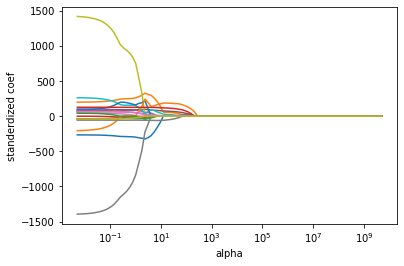

In [92]:
lasso = Lasso(max_iter = 10000) # default is 1000, but more iterations required to converge
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train_std,y_train)
    coefs.append(lasso.coef_)
    
%matplotlib inline
ax = plt.gca() # Get the current Axes instance
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('standerdized coef')

In [93]:
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit(X_train_std, y_train)
print(lassocv.score(X_test_std, y_test))

## alternatively, one can implement the follwoing
lasso1 = Lasso(max_iter=10000)
lasso1.set_params(alpha=lassocv.alpha_)
lasso1.fit(X_train_std, y_train)
print(lasso1.score(X_test_std, y_test))

0.3922445225659341
0.3922445225659341


In [94]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lassocv.coef_, index=X.columns)

AtBat            0.000000
Hits            49.848096
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           66.380815
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          19.017234
CRuns            0.000000
CRBI           180.885189
CWalks           0.000000
PutOuts        109.766693
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W     -43.461215
NewLeague_N      0.000000
dtype: float64

## Logistic Regression with Penalty

In [95]:
import pandas as pd
import numpy as np
caravan = pd.read_csv('caravan.csv')
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [96]:
caravan.shape

(5822, 86)

In [97]:
X = caravan.drop(['Purchase'],axis = 1)
y = caravan['Purchase']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [100]:
fit1 = LogisticRegression(random_state = 1,penalty = 'none', max_iter = 1000).fit(X_train,y_train)
fit1.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9357609069048437

In [101]:
fit1 = LogisticRegression(random_state=1, penalty='none', max_iter=5000).fit(X_train, y_train)
fit1.score(X_test, y_test)

0.9354173823428376

In [102]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [104]:
## For logistic regression WIHOUT penalty, whether or not to do standardization does not make a difference.
fit2 = LogisticRegression(random_state=1, penalty='none', max_iter = 10000).fit(X_train_std, y_train)
fit2.score(X_test_std, y_test)

0.9350738577808313

In [ ]:
fit3 = LogisticRegressionCV(Cs=30,random_state=1,penalty='l1',solver='saga',cv=5,max_iter = 5000).fit(X_train_std, y_train)
fit3.score(X_test_std, y_test)

In [ ]:
fit3.Cs_

In [ ]:
fit4 = LogisticRegressionCV(Cs=30,random_state=1,penalty='l2',cv=5,max_iter=10000).fit(X_train_std, y_train)
fit4.score(X_test_std, y_test)